# Actividad Módulo 19: Ejercicio Exploratory Data Analysis Parte 1
- Generar un análisis EDA con lo aprendido hasta el momento
    - Lectura, head, tail, sample, describe y validación de columnas numéricas
    - Total de videojuegos analizados
    - Total de géneros analizados
    - Plataformas analizadas
    - Total de ventas por año (para NA, EU, JP, Otros y Global)
    - Juegos más vendidos por año (para NA, EU, JP, Otros y Global)
    - Plataformas con más ingresos por año (para NA, EU, JP, Otros y Global)
    - Gráfico de comparación de ventas entre géneros por año
    - 2 gráficos adicionales que provean un insight interesante

In [1]:
import pandas as pd
from plotly import express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Leer df y head
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Tail
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [4]:
# Sample
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13112,13114,All Star Tennis 99,N64,1999.0,Sports,Ubisoft,0.04,0.01,0.0,0.00,0.05
9039,9041,Asphalt: Urban GT 2,DS,2006.0,Racing,Ubisoft,0.09,0.04,0.0,0.01,0.14
10615,10617,Kelly Slater's Pro Surfer,XB,2002.0,Sports,Activision,0.08,0.02,0.0,0.00,0.10
6182,6184,Shrek: Ogres & Dronkeys,DS,2007.0,Simulation,Activision,0.26,0.00,0.0,0.02,0.28
9444,9446,The BIGS 2,PS3,2009.0,Sports,Take-Two Interactive,0.12,0.00,0.0,0.01,0.13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
# Número total de juegos, número total de géneros y plataformas presentes en la base de datos
print(f'The total number of different titles are', df['Name'].unique().__len__())
print('There are', df['Genre'].unique().__len__(), 'different genres in the database')
print('There are', df['Platform'].unique().__len__(), 'different platforms in the database. They are:',  *(platform + ',' for platform in df['Platform'].unique().tolist()))

The total number of different titles are 11493
There are 12 different genres in the database
There are 31 different platforms in the database. They are: Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, 3DS, PS4, N64, PS, XB, PC, 2600, PSP, XOne, GC, WiiU, GEN, DC, PSV, SAT, SCD, WS, NG, TG16, 3DO, GG, PCFX,


### Insights 1:
- Hay 16,598 registros
- A pesar de haber casi 16,600 registros, solamente hay 11,493 nombres únicos. Dado que los campos Year, Genre y Publisher deberían ser iguales para el mismo juego, Es posbile que se esté generando un registro nuevo por cada combinación de nombre y plataforma para poder desagregar las ventas hechas del mismo juego dependiendo de la consola o plataforma en la que se hicieron las ventas
- Hay 271 registros de videojuegos sin año de lanzamiento
- Hay 58 registros sin compañía que publicó el fuego

In [8]:
# Confirmar que la razón de los múltiples nombres iguales sea por diferencias en la plataforma
df[['Name', 'Rank']].groupby('Name').count().rename(columns={'Rank':'Count'}).sort_values('Count', ascending=False).iloc[:10]

,Count
Name,
Need for Speed: Most Wanted,12
Ratatouille,9
Madden NFL 07,9
FIFA 14,9
LEGO Marvel Super Heroes,9
Monopoly,8
LEGO Jurassic World,8
FIFA Soccer 13,8
Lego Batman 3: Beyond Gotham,8


In [9]:
# Tomamos el video juego con más ocurrencias de nombre y lo mostramos en el df original 
df[df['Name'] == 'Need for Speed: Most Wanted']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
252,253,Need for Speed: Most Wanted,PS2,2005.0,Racing,Electronic Arts,2.03,1.79,0.08,0.47,4.37
498,499,Need for Speed: Most Wanted,PS3,2012.0,Racing,Electronic Arts,0.71,1.51,0.06,0.61,2.89
1173,1175,Need for Speed: Most Wanted,X360,2012.0,Racing,Electronic Arts,0.62,0.80,0.01,0.15,1.58
1530,1532,Need for Speed: Most Wanted,X360,2005.0,Racing,Electronic Arts,1.00,0.17,0.02,0.10,1.29
1742,1744,Need for Speed: Most Wanted,PSV,2012.0,Racing,Electronic Arts,0.38,0.52,0.01,0.25,1.16
2005,2007,Need for Speed: Most Wanted,XB,2005.0,Racing,Electronic Arts,0.53,0.46,0.00,0.05,1.04
3585,3587,Need for Speed: Most Wanted,GC,2005.0,Racing,Electronic Arts,0.43,0.11,0.00,0.02,0.56
5900,5902,Need for Speed: Most Wanted,PC,2005.0,Racing,Electronic Arts,0.02,0.23,0.00,0.05,0.30
6149,6151,Need for Speed: Most Wanted,WiiU,2013.0,Racing,Electronic Arts,0.14,0.12,0.00,0.02,0.28
6278,6280,Need for Speed: Most Wanted,DS,2005.0,Racing,Electronic Arts,0.24,0.01,0.00,0.02,0.27


### Insights 2:
- A diferencia de lo que había teorízado con anterioridad, hay más diferencias que únicamente la plataforma. El año de lanzamiento cambia de igual manera. Esto se puede dar debido a reissues o ports del juego. Por ejemplo, para el xbox 360 se lanzó dos veces, la primera en 2005 y la segunda en 2012. Dada una investigación en internet, puedo confirmar que el juego se lanzó dos veces, el original en 2005 y después otra vez en 2012 con mejoras en los gráficos. Posteriormente, en 2013 se hizo el port de la versión con mejores gráficos a Wii U.

In [10]:
# Total de Ventas por año de lanzamiento

# Unpivot sales columns para facilidad en la generación de gráficos multi panel
df_unpivoted = pd.melt(df, id_vars=['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'] )
df_unpivoted.rename(columns={'variable': 'Zone'}, inplace=True)

In [11]:
df_unpivoted

,Rank,Name,Platform,Year,Genre,Publisher,Zone,value
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,NA_Sales,41.49
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,NA_Sales,29.08
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,NA_Sales,15.85
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,NA_Sales,15.75
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,NA_Sales,11.27
...,...,...,...,...,...,...,...,...
82985,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,Global_Sales,0.01
82986,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,Global_Sales,0.01
82987,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,Global_Sales,0.01
82988,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,Global_Sales,0.01


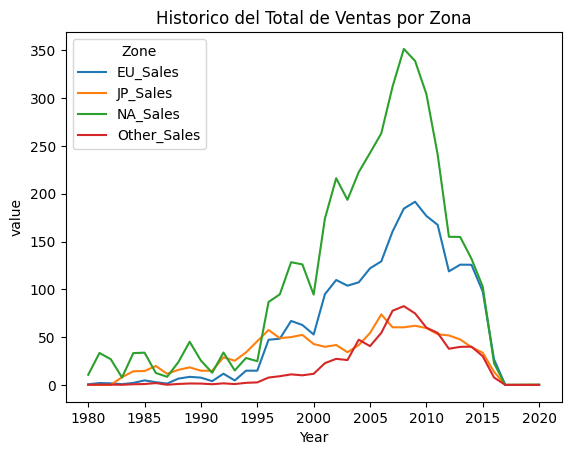

In [12]:
# Gráfico de total de ventas por año por zona
# Using seaborn
ax = sns.lineplot(df_unpivoted[df_unpivoted['Zone'] != 'Global_Sales'].groupby(['Year', 'Zone']).sum(numeric_only=True).reset_index(), x='Year', y='value', hue='Zone').set(title='Historico del Total de Ventas por Zona')

# Using plotly express
fig = px.line(df_unpivoted[df_unpivoted['Zone'] != 'Global_Sales'].groupby(['Year', 'Zone']).sum(numeric_only=True).reset_index(), x='Year', y='value', color='Zone', title='Historic of total Zales by Zone')
fig.show()

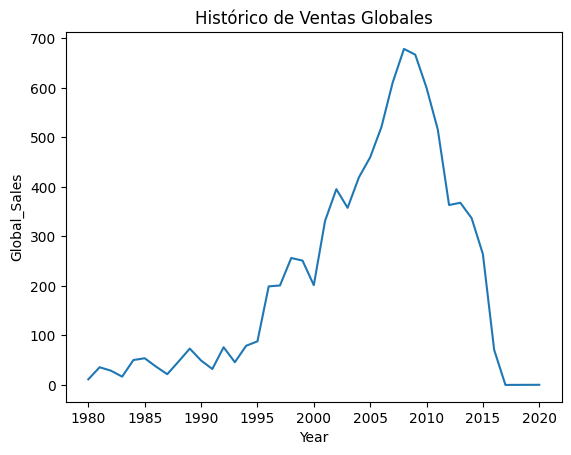

In [13]:
# Gráfico de ventas globales por año
fig = sns.lineplot(df.groupby('Year').sum(numeric_only=True).reset_index(), x='Year', y='Global_Sales').set(title='Histórico de Ventas Globales')

# Usando Plotly
fig = px.line(df.groupby(['Year']).sum(numeric_only=True).reset_index(), x = 'Year', y='Global_Sales', title='Histórico de Ventas Globales')
fig.show()


### Insights 3:
- En ventas totales, de los juegos incluidos en la base de datos. La mayoría de las ventas se concentran en juegos cuyo año de lanzamiento fue 2008, seguido de juegos cuyo año de lanzamiento fue 2009.
- Para ventas por zona, se ve reflejado el mismo comportamiento donde la mayoría de las ventas se realizaron de juegos cuyo año de lanzamiento fue ya sea en 2008 o 2009. La única excepción es Japón cuyo pico de ventas fue de juegos que se lanzaron en 2006
- Como se puede ver en la comparación entre zonas, la mayor zona de consumo de videojuegos es América del Norte, seguido de Europa y en menor medida Japón y el resto del mundo
- Las ventas de juegos han disminuido para juegos con años de lanzamiento a partir de 2009 en todos los casos

### Juegos con más ventas 

In [14]:
# Juegos con mayores ventas por zona por año

# El df sampled al final es una matriz de los nombres de los juegos más vendidos por año y por zona

df_aux = df.groupby(['Name', 'Year']).sum(numeric_only=True).reset_index()      # Agregar juegos mismos lanzamientos para diferentes plataformas

year_list = sorted(df_aux['Year'].unique().astype(np.int64()))          # Lista de todos los años presentes en la base de datos

df_skeleton = []        # Lista que se utilizará para armar la tabla de nombres por año y zona

for year in year_list:
    row = [year]
    for zone in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']:
        game_name = df_aux[df_aux['Year'] == year].loc[df_aux[df_aux['Year'] == year][zone].idxmax()]['Name']           # Obtener el nombre del juego más vendido para esa zona en ese año y agregarlo a row
        row.append(game_name)
    df_skeleton.append(row)         # Agregar row a df_skeleton

highest_sold_games = pd.DataFrame(df_skeleton, columns=['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'])     # Creación de la tabla de nombres como Data Frame
highest_sold_games.sample(20)       # Sample de la tabla para no saturar el output al hacer el .pdf

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,2013,Grand Theft Auto V,Grand Theft Auto V,Pokemon X/Pokemon Y,Grand Theft Auto V,Grand Theft Auto V
16,1996,Pokemon Red/Pokemon Blue,Pokemon Red/Pokemon Blue,Pokemon Red/Pokemon Blue,Pokemon Red/Pokemon Blue,Pokemon Red/Pokemon Blue
36,2016,Tom Clancy's The Division,FIFA 17,Yokai Watch 3,FIFA 17,FIFA 17
20,2000,Madden NFL 2001,Driver 2,Dragon Quest VII: Warriors of Eden,Pokémon Crystal Version,Pokémon Crystal Version
7,1987,Zelda II: The Adventure of Link,Zelda II: The Adventure of Link,Dragon Warrior II,Zelda II: The Adventure of Link,Zelda II: The Adventure of Link
21,2001,Grand Theft Auto III,Gran Turismo 3: A-Spec,Final Fantasy X,Grand Theft Auto III,Gran Turismo 3: A-Spec
18,1998,Pokémon Yellow: Special Pikachu Edition,Pokémon Yellow: Special Pikachu Edition,Pokémon Yellow: Special Pikachu Edition,Pokémon Yellow: Special Pikachu Edition,Pokémon Yellow: Special Pikachu Edition
22,2002,Grand Theft Auto: Vice City,Grand Theft Auto: Vice City,Pokemon Ruby/Pokemon Sapphire,Grand Theft Auto: Vice City,Grand Theft Auto: Vice City
13,1993,Super Mario All-Stars,Super Mario All-Stars,Super Mario All-Stars,Super Mario All-Stars,Super Mario All-Stars
10,1990,Super Mario World,Super Mario World,Super Mario World,Super Mario World,Super Mario World


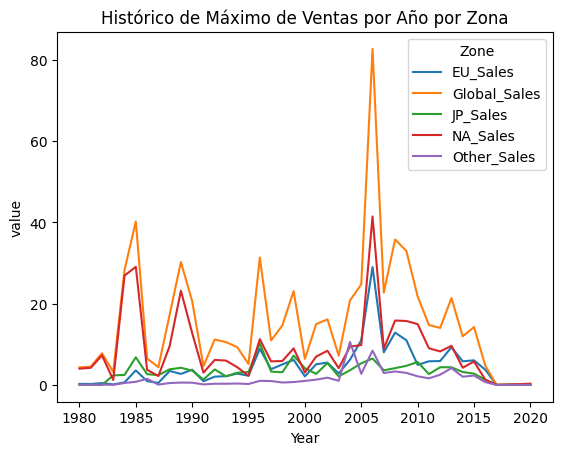

In [15]:
# Grafica que acompaña a las listas anteriores para ver cómo vario el máximo de ventas de los juegos a lo largo de los años en las diferentes regiones 
sns.lineplot(df_unpivoted.groupby(['Year', 'Zone']).max(numeric_only=True).reset_index(), x='Year', y='value', hue='Zone').set(title='Histórico de Máximo de Ventas por Año por Zona')

# Con Plotly
fig = px.line(df_unpivoted.groupby(['Year', 'Zone']).max(numeric_only=True).reset_index(), x = 'Year', y = 'value', color='Zone', title='Histórico de Máximo de Ventas por Año por Zona')
fig.show()

### Insights 4:
- Como se puede ver en los gráficos, hay una cierta periodicidad en los máximos de ventas en donde existen picos muy marcados en ciertos años. Principalmente se pueden ver en los años: 1984, 1985, 1989, 1996, 1999, 2006 y 2008
- Podemos hacer una busqueda en el df que se creó para ver cuáles fueron los juegos de esos años, probablemente van a ser juegos que fueron sumamente populares o que incluso revolucionaron el mercado de videojuegos

In [16]:
highest_sold_games[highest_sold_games['Year'].isin([1984, 1985, 1989, 1996, 1999, 2006, 2008])]

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,1984,Duck Hunt,Duck Hunt,Golf,Duck Hunt,Duck Hunt
5,1985,Super Mario Bros.,Super Mario Bros.,Super Mario Bros.,Super Mario Bros.,Super Mario Bros.
9,1989,Tetris,Super Mario Land,Tetris,Tetris,Tetris
16,1996,Pokemon Red/Pokemon Blue,Pokemon Red/Pokemon Blue,Pokemon Red/Pokemon Blue,Pokemon Red/Pokemon Blue,Pokemon Red/Pokemon Blue
19,1999,Pokemon Gold/Pokemon Silver,Pokemon Gold/Pokemon Silver,Pokemon Gold/Pokemon Silver,Pokemon Gold/Pokemon Silver,Pokemon Gold/Pokemon Silver
26,2006,Wii Sports,Wii Sports,New Super Mario Bros.,Wii Sports,Wii Sports
28,2008,Mario Kart Wii,Mario Kart Wii,Monster Hunter Freedom Unite,Mario Kart Wii,Mario Kart Wii


- Como podemos ver, en los años mencionados se encuentran juegos que fueron sumamente populares, tan populares de hecho que el juego se repite en todas las zonas, es decir que fue un fenómeno mundial la popularidad de esos juegos.
- Se pueden apreciar juegos como:
    - Duck Hunt - que introdujo una manera de jugar innovador donde se utilizaba un control con forma de pistola y un receptor que permitía apuntar a la televisión para dispararle a los patos
    - Super Mario Bros. - El primero de la serie más popular de Nintendo
    - Tetris - Un juego clásico del cual se siguen haciendo competencias y records hoy en día
    - Pokemon Red y Blue - De los primeros juegos de pokemon que salieron y el primero de una serie de juegos que ha sido muy popular para consolas portátiles como Game Boy, Nintendo DS y Nintendo Switch
    - Wii Sports - Juego incluido con la consola Wii que fue una consola innovadora en donde el atractivo era que todos los juegos podían aprovechar de un sistema de apuntar con el control, similar a Duck Hunt
    - Mario Kart Wii - Una continuación del popular juego de Nintendo 64 pero con mejores gráficos y más opciones de juego, pistas, etc. Probablemente el juego de Mario Kart más popular junto con el nuevo juego para Switch (La base de datos no incluye ningún juego para Switch)

### Plataformas con más ingresos por año

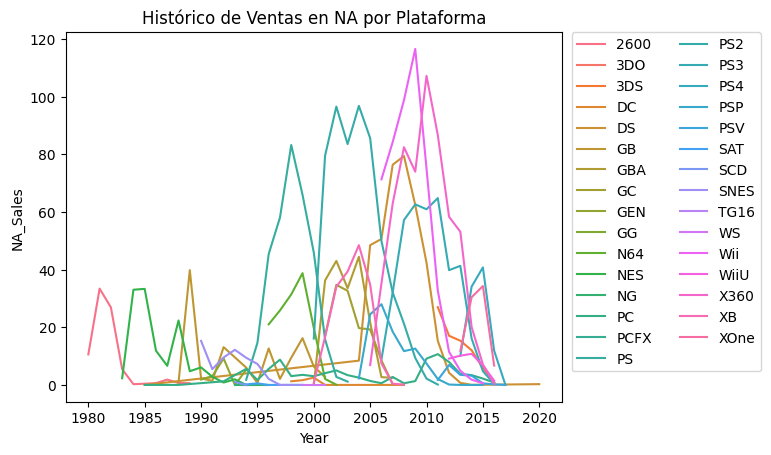

In [17]:
# Plataformas con más ingresos por año
# NA Sales
fig = sns.lineplot(df.groupby(['Platform', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='NA_Sales', hue='Platform')
fig.set(title='Histórico de Ventas en NA por Plataforma')
fig.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, ncol=2)

# Con Plotly
fig = px.line(df.groupby(['Year', 'Platform']).sum(numeric_only=True).reset_index(), x='Year', y='NA_Sales', title='Histórico de Ventas en NA por Plataforma', color='Platform')
fig.show()

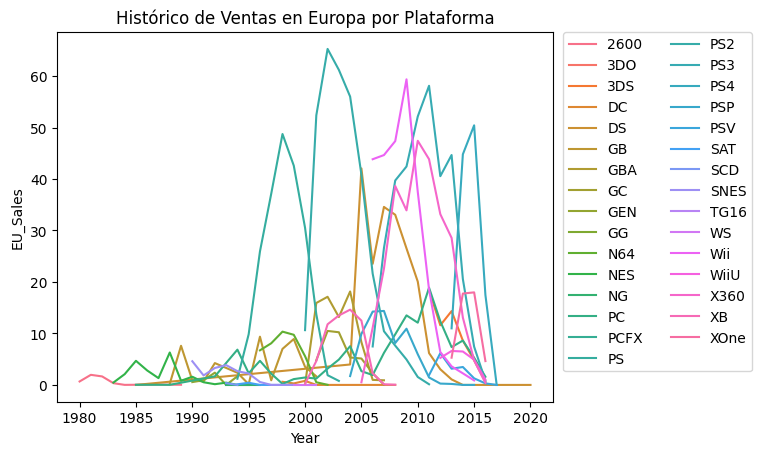

In [18]:
# EU Sales
fig = sns.lineplot(df.groupby(['Platform', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='EU_Sales', hue='Platform')
fig.set(title='Histórico de Ventas en Europa por Plataforma')
fig.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, ncol=2)

# Con plotly
fig = px.line(df.groupby(['Platform', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='EU_Sales', color='Platform', title='Histórico de Ventas en Europa por Plataforma')
fig.show()

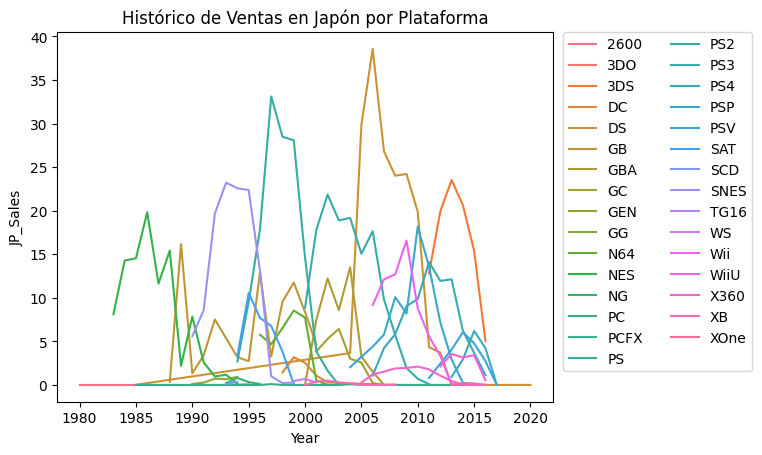

In [19]:
# Japan sales
fig = sns.lineplot(data=df.groupby(['Platform', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='JP_Sales', hue='Platform')
fig.set(title='Histórico de Ventas en Japón por Plataforma')
fig.legend(loc='upper left', bbox_to_anchor=(1.02,1), borderaxespad=0, ncol=2)

# Con plotly
fig = px.line(df.groupby(['Platform', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='JP_Sales', color='Platform', title='Historic of Japan Sales by Platform')
fig.show()

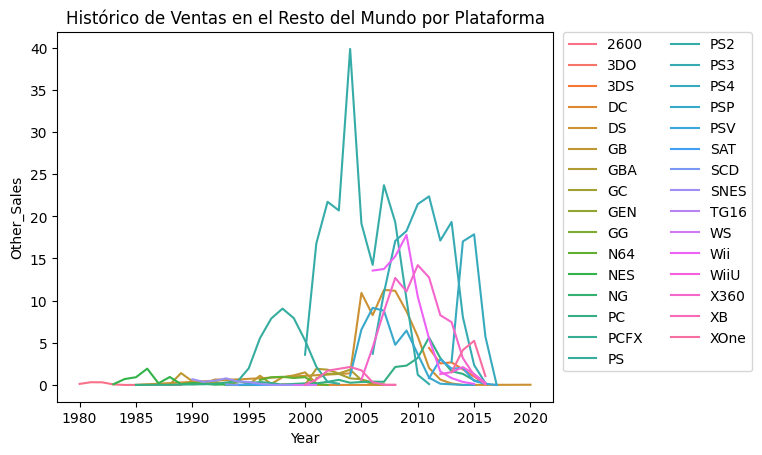

In [20]:
# Sales for the rest of the world
fig = sns.lineplot(data=df.groupby(['Platform', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='Other_Sales', hue='Platform')
fig.set(title='Histórico de Ventas en el Resto del Mundo por Plataforma')
fig.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, ncol=2)

# Con plotly
fig = px.line(df.groupby(['Platform', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='Other_Sales', color='Platform', title='Historic of Sales in the Rest of the World by Platform')
fig.show()

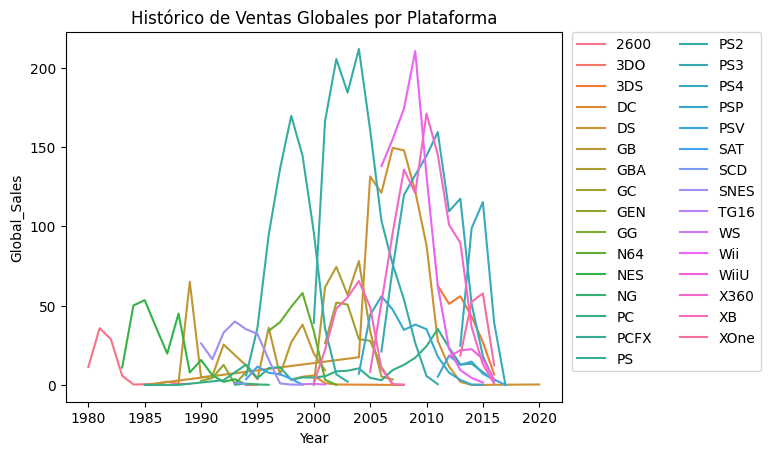

In [21]:
# Global sales by year and platform
fig = sns.lineplot(data=df.groupby(['Platform', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='Global_Sales', hue='Platform')
fig.set(title='Histórico de Ventas Globales por Plataforma')
fig.legend(loc='upper left', bbox_to_anchor=(1.02,1), borderaxespad=0, ncol=2)

# Con plotly
fig = px.line(df.groupby(['Platform', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='Global_Sales', color='Platform', title='Historic of Global Sales by Platform')
fig.show()

### Insights 5:
- Viendo los diferentes gráficcos se puede ver como Norte América es la región con más historia en los videojuegos puesto que es la única región donde el Atari 2600 tuvo ventas significativas. Seguido de ésta región viene Japón cuya historia en el mercado de los videojuegos comenzó principalmente con el NES de Nintendo (compañía Japonesa). Europa comenenzó a tener ventas significativas de videojuegos hasta el lanzamiento del PlayStation y para las regiones comprendidas como Other, la primer gran consola fue el PlayStation 2
- Con estos gráficos de históricos de ventas nos podemos dar cuenta de las consolas y tendencias más populares en las diferentes zonas:
    - A nivel global, las consolas más populares fueron en su tiempo el Atari 2600, seguido del NES, el Play Station, el Play Station 2 que (ganó por mucho a sus contemporaneos el Xbox y el GameCube) y, a mi sorpresa, el Wii y Nintendo DS ganaron en Ventas tanto al Xbox como al Play Station 3, probablemente por ser consolas innovadoras dado el sistema de apuntar y la pantalla touch del DS
    - En Europa, la batalla por la consola más popular entre la Xbox 360 y la PlayStation 3 la ganó la Play Station, mientras que en América del Norte, la gano la Xbox 360
    - Japón tiene una gran afinidad por sus consolas locales de Nintendo. La unica consola ajena a Nintendo que figuró dentro de las plataformas con más ventas fue la PlayStation 2 se Sony (empresa que también es Japonesa) y le ganó tanto al GameCube como al GameBoy Advance, consolas contemporaneas al PS2 producidas por Nintendo
    - La consola con mayores ventas fue el Play Station 2 con juegos lanzados en 2004, seguido muy de cerca por el Wii con juegos lanzados en 2009

### Gráfico de Comparación de Ventas Entre Géneros por Años

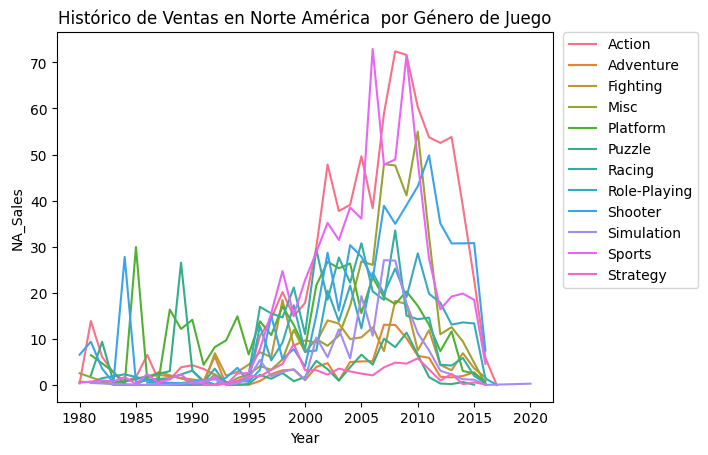

In [22]:
# Gráfico de comparación de ventas por Genero en NA
fig = sns.lineplot(df.groupby(['Genre', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='NA_Sales', hue='Genre')
fig.set(title='Histórico de Ventas en Norte América  por Género de Juego')
fig.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Con Plotly
fig = px.line(df.groupby(['Genre', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='NA_Sales', color='Genre', title='Histórico de Ventas en Norte América  por Género de Juego')
fig.show()

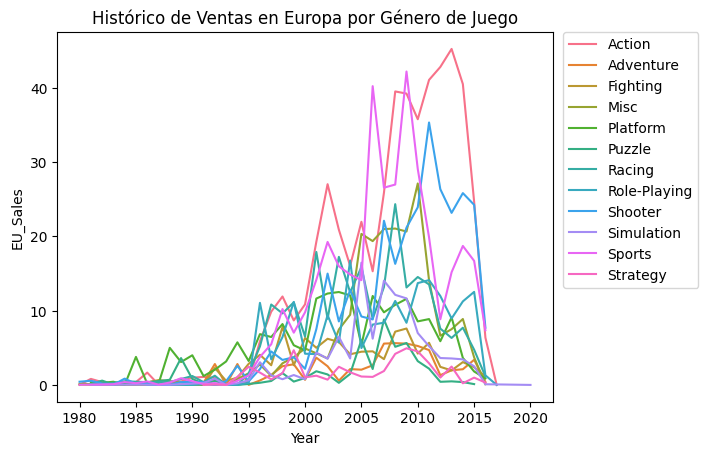

In [23]:
# Gráfico de comparación de ventas por Genero en EU
fig = sns.lineplot(df.groupby(['Genre', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='EU_Sales', hue='Genre')
fig.set(title='Histórico de Ventas en Europa por Género de Juego')
fig.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Con Plotly
fig = px.line(df.groupby(['Genre', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='EU_Sales', color='Genre', title='Histórico de Ventas en Europa por Género de Juego')
fig.show()

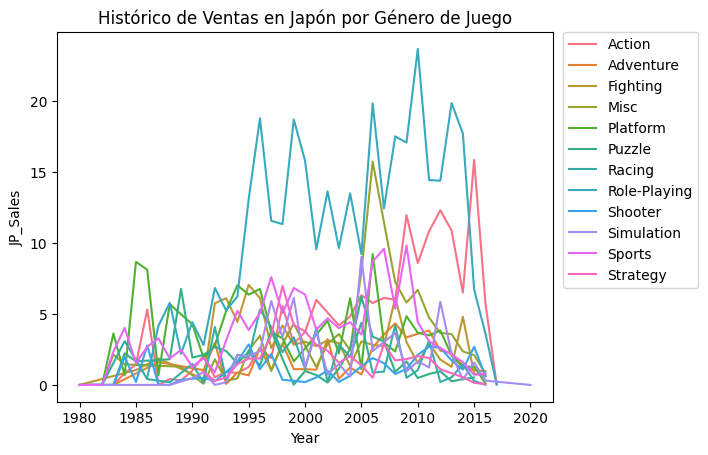

In [24]:
# Gráfico de comparación de ventas por Genero en JP
fig = sns.lineplot(df.groupby(['Genre', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='JP_Sales', hue='Genre')
fig.set(title='Histórico de Ventas en Japón por Género de Juego')
fig.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Con Plotly
fig = px.line(df.groupby(['Genre', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='JP_Sales', color='Genre', title='Histórico de Ventas en Japón por Género de Juego')
fig.show()

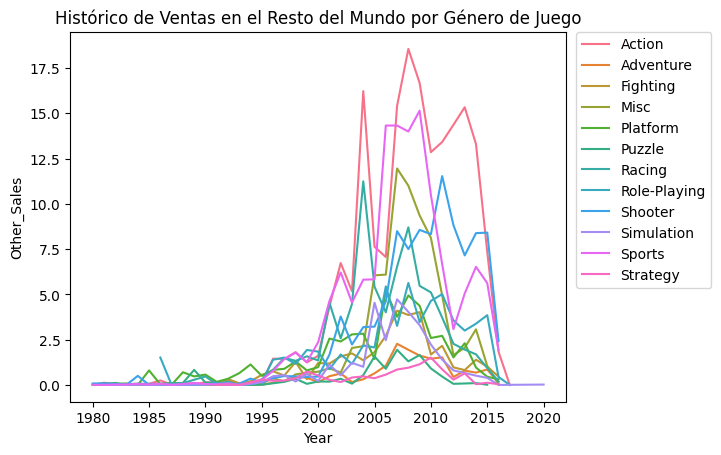

In [25]:
# Gráfico de comparación de ventas por Genero en El resto del mundo
fig = sns.lineplot(df.groupby(['Genre', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='Other_Sales', hue='Genre')
fig.set(title='Histórico de Ventas en el Resto del Mundo por Género de Juego')
fig.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Con Plotly
fig = px.line(df.groupby(['Genre', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='Other_Sales', color='Genre', title='Histórico de Ventas en el Resto del Mundo por Género de Juego')
fig.show()

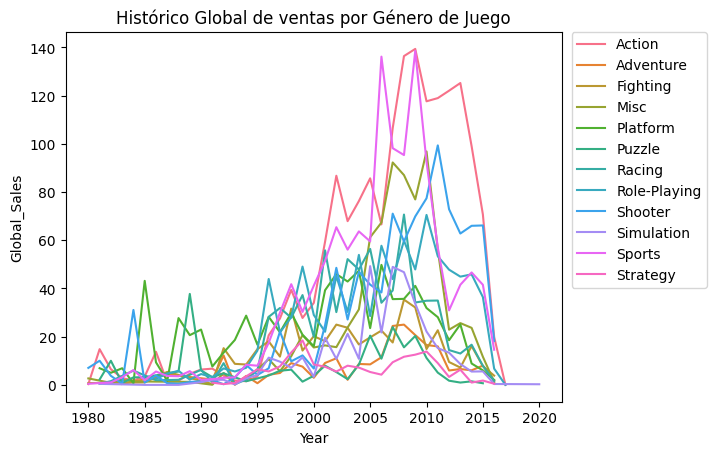

In [26]:
# Gráfico de comparación de ventas Globales por Genero
fig = sns.lineplot(df.groupby(['Genre', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='Global_Sales', hue='Genre')
fig.set(title='Histórico Global de ventas por Género de Juego')
fig.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Con Plotly
fig = px.line(df.groupby(['Genre', 'Year']).sum(numeric_only=True).reset_index(), x='Year', y='Global_Sales', color='Genre', title='Histórico Global de Ventas por Género de Juego')
fig.show()

### Insights 6:
- En cuanto a las ventas de juegos por categorías, podemos ver que las ventas en Norte América, Europa y el resto del mundo se han comportado de manera muy similar a partir del año 2000 donde el género más popular era el de Acción, hasta aproximadamente 2006 que fue superado por el género de Deportes, en 2007 volvió a ser más popular el género de Acción y a partir de 2008 el género de Shooters ganó popularidad al ser el segundo genero de juego más vendido
- En Japón la historia es muy diferente, donde desde 1995 el indiscutido ganador es el género de peleas y no fue superado hasta 2015 por el género de Acción
- Otro fenómeno que podemos ver en todas las regiones es como en 1986 hubo un pico en juegos del género Platform debido al exito mundial de Super Mario Bros, en algunas regiones el pico es más pronunciado como en Norte América y Japón que son las regiones que tienen más historia de jugar videojuegos y en Europa y el resto del mundo el pico es menor puesto que las ventas de juegos en esos años era mucho menor en comparación con años más recientes. Lo mismo ocurre ne 1988 debido al lanzamiento de Tetris que hay un pico en el género de Puzzle


## Gráficos Adicionales
### Evolución de la cuota de mercado de las consolas portátiles

In [27]:
# Catalogar las diferentes plataformas de los juegos como consola portátile o consola normal
lista_de_consolas = sorted(list(df['Platform'].unique()))
print(lista_de_consolas)

['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']


In [28]:
# De la lista de consolas anterior, investigamos y agregamos a una lista las consolas que son portatiles
portable_consoles = ['3DS', 'DS', 'GB', 'GBA', 'GG', 'PSP', 'PSV', 'WS']

df['Platform_Type'] = df['Platform'].apply(lambda x: 'Portable' if x in portable_consoles else 'Home Console')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_Type
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Home Console
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Home Console
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Home Console
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Home Console
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Portable


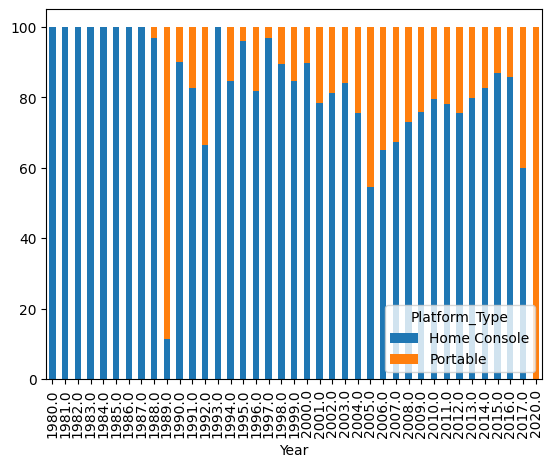

In [29]:
# Evolución de la cuota de mercado de las consulas portátiles
df_platform_type = df.groupby(['Year', 'Platform_Type']).sum(numeric_only=True).reset_index()[['Year', 'Platform_Type', 'Global_Sales']]

sales_total_by_year = df_platform_type.groupby('Year').sum(numeric_only=True)

df_platform_type['Platform_Type_%'] = df_platform_type['Year'].apply(lambda x : sales_total_by_year.loc[x][0])
df_platform_type['Platform_Type_%'] = (df_platform_type['Global_Sales'] / df_platform_type['Platform_Type_%']) * 100
df_platform_type

# Usando seaborn
aux_df_platform_type = df_platform_type.drop(columns=['Global_Sales']).pivot(index='Year', columns='Platform_Type', values='Platform_Type_%')
aux_df_platform_type.plot(kind='bar', stacked=True)

# Usando Plotly
fig = px.bar(df_platform_type, x='Year', y='Platform_Type_%', color='Platform_Type', title='Histórico al 100% de las ventas por tipo de consola')
fig.show()

In [30]:
df[(df['Year'] == 1989) & (df['Platform_Type'] == 'Portable')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_Type
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Portable
21,22,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14,Portable
170,171,Dr. Mario,GB,1989.0,Puzzle,Nintendo,2.18,0.96,2.00,0.20,5.34,Portable
775,777,Golf,GB,1989.0,Sports,Nintendo,0.83,0.33,0.92,0.04,2.12,Portable
852,854,Tennis,GB,1989.0,Sports,Nintendo,0.75,0.30,0.90,0.04,1.99,Portable
880,882,Alleyway,GB,1989.0,Puzzle,Nintendo,0.96,0.38,0.55,0.05,1.94,Portable
1142,1144,Baseball,GB,1989.0,Sports,Nintendo,0.66,0.27,0.65,0.03,1.61,Portable
1542,1544,Yakuman,GB,1989.0,Misc,Nintendo,0.00,0.00,1.28,0.00,1.28,Portable
1678,1680,SolarStriker,GB,1989.0,Shooter,Nintendo,0.40,0.39,0.36,0.04,1.20,Portable
1858,1860,The Final Fantasy Legend,GB,1989.0,Role-Playing,SquareSoft,0.00,0.00,1.10,0.00,1.10,Portable


In [31]:
df[(df['Year'] == 2005) & (df['Platform_Type'] == 'Portable')].head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_Type
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,Portable
11,12,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42,Portable
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22,Portable
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30,Portable
41,42,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.27,Portable
90,91,Grand Theft Auto: Liberty City Stories,PSP,2005.0,Action,Take-Two Interactive,2.90,2.83,0.24,1.75,7.72,Portable
122,123,Big Brain Academy,DS,2005.0,Misc,Nintendo,1.67,2.78,1.60,0.62,6.67,Portable
340,341,Midnight Club 3: DUB Edition,PSP,2005.0,Racing,Take-Two Interactive,1.65,1.22,0.00,0.79,3.66,Portable
437,438,Sonic Rush,DS,2005.0,Platform,Sega,1.22,1.57,0.06,0.29,3.15,Portable
788,790,Need for Speed: Most Wanted 5-1-0,PSP,2005.0,Racing,Electronic Arts,1.77,0.13,0.02,0.18,2.10,Portable


### Insights 7:
- En general, las consolas de casa son más populares que las portátiles. Podemos ver una ligera tendencia en las ventas de juegos para consolas portátiles que puede indicar que estás están popularizando las consolas portatiles, sin embargo, el crecimiento en ventas no ha sido estable
- El único año de lanzamiento en el que fueron más populares las consolas portátiles que las de casa fue en 1989, principalmente gracias al juego Tetris y, en menor medida, el Super Mario Land. 
- Para juegos con año de lanzamiento de 1989, el 88% de las ventas fueron de juegos para consola portátil
- El siguiente año de lanzamiento con mayor porcentaje de ventas para juegos para consola portátil, de los que se tienen datos significativos, es 2005, en donde hubo muchos lanzamientos de juegos populares para DS como Nintendogs y Mario Kart DS

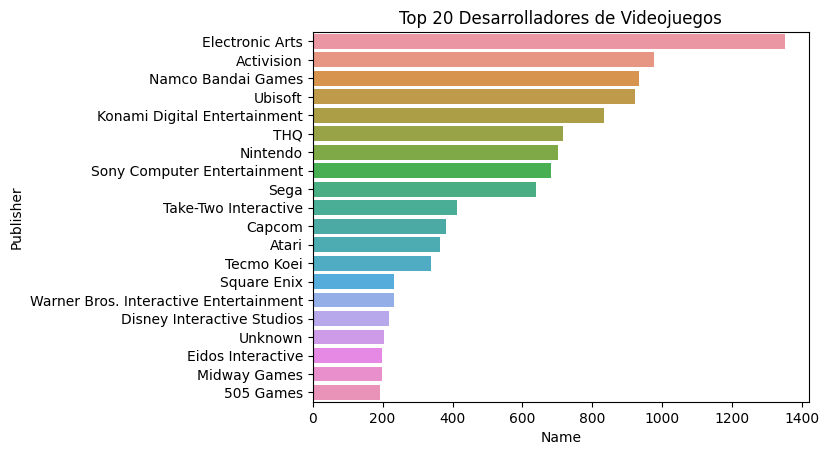

In [32]:
# Biggest Publishers (Top 20)
# Estudios de juegos con mayor cantidad de juegos lanzados (juegos lanzados para diferentes plataformas, al igual que relanzamientos de juegos cuentan como un juego diferente dado que requieren trabajo extra para hacer el port)

fig = sns.barplot(df.groupby(['Publisher']).count().sort_values('Name', ascending=False).iloc[:20].reset_index(), x='Name', y='Publisher')
fig.set(title='Top 20 Desarrolladores de Videojuegos')

# Using Plotly
fig = px.bar(df.groupby('Publisher').count().sort_values('Name', ascending=False).iloc[:20].reset_index(), x='Name', y='Publisher', title='Top 20 Desarrolladores de Videojuegos')
fig.show()

### Insights 8:
- El mayor desarrolladore de videojuegos, presente en la base de datos es Electronic Arts, mejor conocido como EA, con títulos pupulares como: la franquicia de FIFA, la franquicia de Madden, la franquicia de Sims, la franquicia de Battlefield, etc.
- A vista, se puede percibir que podrían haber diferentes tamaños de desarrolladores basandonos en la cantidad de juegos que han producido y aparecen en la base de datos, el mas grande EA, seguidos de un grupo conformado por Activision, Namco Bandai, Ubisoft y Konami, despues un tercer grupo con THQ, Nintendo, Sony y Sega, un cuarto grupo con Take-Two, Capcom, Atari y Tecmo Koei y el quinto grupo con el resto de los desarrolladores mostrados
- Algo interesante es que hay 203 juegos de los que no se conoce el desarrollador, esto se podría deber a falta de información o que pertenezcan a desarrolladores independientes o estudios pequeños

In [33]:
# Top 10 juegos de EA
df[df['Publisher'] == 'Electronic Arts'].sort_values('Global_Sales', ascending=False).head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform_Type
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49,Home Console
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24,Home Console
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11,Home Console
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67,Home Console
99,100,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34,Home Console
103,104,Battlefield 3,PS3,2011.0,Shooter,Electronic Arts,2.85,2.93,0.35,1.10,7.23,Home Console
104,105,Need for Speed Underground,PS2,2003.0,Racing,Electronic Arts,3.27,2.83,0.08,1.02,7.20,Home Console
112,113,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90,Home Console
113,114,Need for Speed Underground 2,PS2,2004.0,Racing,Electronic Arts,2.71,3.02,0.08,1.09,6.90,Home Console
114,115,Medal of Honor: Frontline,PS2,2002.0,Shooter,Electronic Arts,2.93,2.75,0.17,0.99,6.83,Home Console


###
 Insights 8.1:
- En ese extracto del dataframe se puede apreciar como en el top 10 de juegos más vendidos de EA se encuentran varios juegos de franquicias que son o fueron muy populares como FIFA, Battlefield, Need for Speed, Sims y Medal of Honor

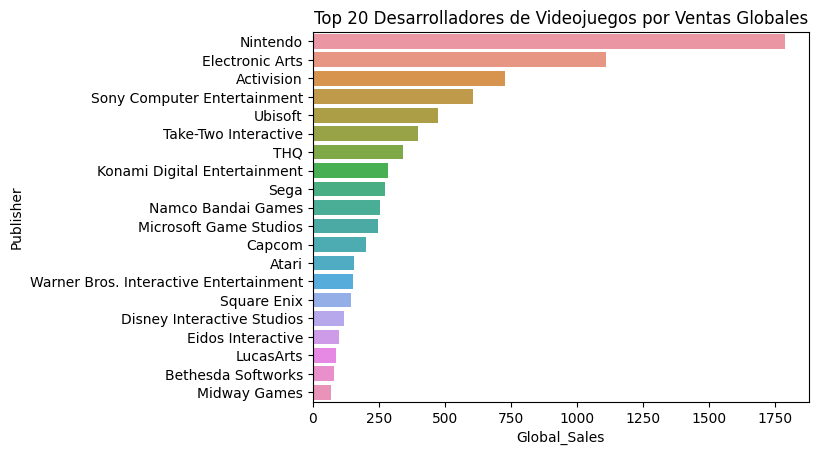

In [34]:
# Top 20 desarrolladores de juegos por ventas globales
fig = sns.barplot(df.groupby('Publisher').sum(numeric_only=True).sort_values('Global_Sales', ascending=False).iloc[:20].reset_index(), x='Global_Sales', y='Publisher')
fig.set(title='Top 20 Desarrolladores de Videojuegos por Ventas Globales')

# Plotly
fig = px.bar(df.groupby('Publisher').sum(numeric_only=True).sort_values('Global_Sales', ascending=False).iloc[:20].reset_index(), x='Global_Sales', y='Publisher', title='Top 20 Desarrolladores de Videojuegos por Ventas Globales')
fig.show()

### Insights 9:
- En cuanto a ventas globales, el top 20 de desarrolladores es sumamente diferente a cuando lo vemos por número de juegos publicados
- Los estudios de videojuegos que no aparecían en el top 20 por número de juegos pero sí por ventas globales son: Microsoft Game Studios, Lucas Arts y Bethesda Studios
- Por ventas globales, Nintendo tiene el peldaño más alto con mucha ventaja respecto al segundo lugar. Esto se puede deber a un conjunto de variables como la popularidad de juegos exclusivos para sus consolas y que los juegos sean de gusto general
- A diferencia del gráfico anterior donde pudimos observar facilmente grupos de desarrolladores que tenían cantidades similares de juegos publicados, cuando vemos la gráfica por total de ventas globales, no es tan fácil hacer esa clasificación visual

# Módulo 20: Ejercicio de Exploratory Data Analysis Parte 2
Usando el archivo de vgsales.csv basado en los últimos 4 años:
- Crecimiento:
    - ¿Qué género de juegos tuvo el mayor y menor crecimiento?
    - ¿Qué región tuvo el mayor y menor crecimiento en ventas?
    - ¿Qué plataforma ha tenido el mayor y menor crecimiento?
    - ¿Qué juego ha tenido el mayor y menor crecimiento?                (?)
- Series de tiempo
    - Ventas por región por plataforma en todo el tiempo de la serie
    - Ventas de los top 5 videojuegos de los últimos 4 años             (?)
- Dos elementos adicionales que muestren oportunidades de mercado

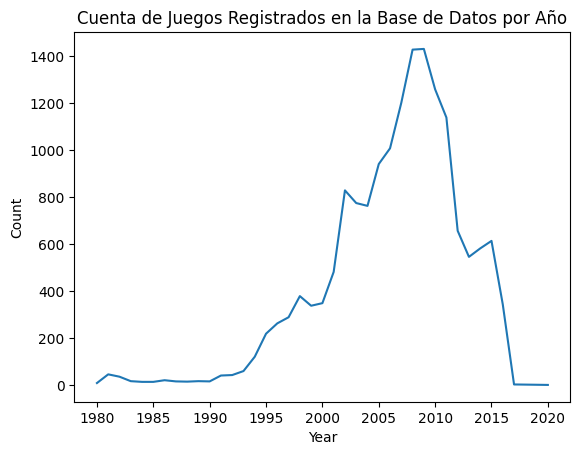

In [35]:
# Revisar la cantidad de juegos registrada por año
df_aux = df.pivot_table(index='Year', values='Global_Sales', aggfunc='count').reset_index()
df_aux.rename(columns={'Global_Sales': 'Count'}, inplace=True)

# Plot count
fig = sns.lineplot(data=df_aux, x='Year', y='Count')
fig.set(title='Cuenta de Juegos Registrados en la Base de Datos por Año')

# Using Plotly
fig = px.line(data_frame=df_aux, x='Year', y='Count', title='Cuenta de Juegos Registrados en la Base de Datos por Año')
fig.show()

In [36]:
df_pivot_count = df.pivot_table(index='Year', columns='Genre', values='Global_Sales', aggfunc='count')
df_pivot_count

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980.0,1.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN
1981.0,25.0,NaN,NaN,NaN,3.0,2.0,1.0,NaN,10.0,1.0,4.0,NaN
1982.0,18.0,NaN,NaN,1.0,5.0,3.0,2.0,NaN,5.0,NaN,2.0,NaN
1983.0,7.0,1.0,NaN,1.0,5.0,1.0,NaN,NaN,1.0,NaN,1.0,NaN
1984.0,1.0,NaN,NaN,1.0,1.0,3.0,3.0,NaN,3.0,NaN,2.0,NaN
1985.0,2.0,NaN,1.0,NaN,4.0,4.0,NaN,NaN,1.0,1.0,1.0,NaN
1986.0,6.0,NaN,NaN,NaN,6.0,NaN,1.0,1.0,4.0,NaN,3.0,NaN
1987.0,2.0,1.0,2.0,NaN,2.0,NaN,NaN,3.0,2.0,NaN,4.0,NaN
1988.0,2.0,NaN,NaN,NaN,4.0,1.0,1.0,3.0,1.0,1.0,2.0,NaN


## Crecimiento por Género por Zona

In [37]:
# Cambiar formato de los df de pandas para que solamente incluyan dos decimales
pd.options.display.float_format = "{:.2f}".format


# Dado que los datos siguen mostrando en 2016 un género sin datos, tomaremos en cuenta 2015 como el último año

df_pivot_genre = df.pivot_table(index='Year', columns='Genre', aggfunc='sum', values='NA_Sales')
df_pivot_genre.loc[2011:2015][list(df_pivot_genre.columns)].pct_change() * 100

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012.00,-2.27,-69.78,-63.47,-65.99,-43.95,-82.14,-70.02,-9.76,-29.63,-58.74,-40.26,-72.02
2013.00,2.44,-8.43,-26.73,14.01,58.74,-36.67,-3.88,-26.67,-12.44,-26.86,16.95,154.26
2014.00,-28.00,19.02,116.67,-24.74,-74.01,226.32,39.19,3.59,0.07,-46.02,3.34,-93.31
2015.00,-41.05,42.27,-47.75,-48.99,-17.22,-91.94,-66.38,-1.55,0.23,-7.38,-6.86,256.25


In [38]:
# Dado que los datos siguen mostrando en 2016 un género sin datos, tomaremos en cuenta 2015 como el último año

df_pivot_genre = df.pivot_table(index='Year', columns='Genre', aggfunc='sum', values='EU_Sales')
df_pivot_genre.loc[2011:2015][list(df_pivot_genre.columns)].pct_change() * 100

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012.00,4.24,-72.07,-57.14,-52.91,-33.63,-80.82,-43.93,-15.11,-25.40,-30.52,-55.54,-65.98
2013.00,5.68,50.38,-19.75,13.12,54.59,14.29,-16.62,-25.31,-12.11,-1.66,71.69,149.49
2014.00,-10.46,7.11,57.44,18.27,-60.07,-20.83,21.84,25.73,11.49,-3.37,23.35,-91.09
2015.00,-39.11,60.19,-22.48,-58.17,-50.14,-71.05,-38.44,11.39,-6.12,-27.03,-10.75,345.45


In [39]:
# Dado que los datos siguen mostrando en 2016 un género sin datos, tomaremos en cuenta 2015 como el último año

df_pivot_genre = df.pivot_table(index='Year', columns='Genre', aggfunc='sum', values='JP_Sales')
df_pivot_genre.loc[2011:2015][list(df_pivot_genre.columns)].pct_change() * 100

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012.00,13.68,-36.81,-39.12,-22.78,10.03,24.68,-93.59,-0.28,-2.60,376.42,-15.91,-41.58
2013.00,-11.54,-8.26,-28.49,-2.19,-45.83,-73.96,170.00,38.01,-33.97,-62.46,-16.99,-26.13
2014.00,-40.26,-38.74,275.00,-34.08,-39.42,64.00,170.37,-10.83,-37.57,-83.18,-25.58,-32.93
2015.00,143.85,-23.53,-83.54,-11.02,2.38,26.83,-80.82,-62.11,149.07,327.03,-55.00,-72.73


In [40]:
# Dado que los datos siguen mostrando en 2016 un género sin datos, tomaremos en cuenta 2015 como el último año

df_pivot_genre = df.pivot_table(index='Year', columns='Genre', aggfunc='sum', values='Other_Sales')
df_pivot_genre.loc[2011:2015][list(df_pivot_genre.columns)].pct_change() * 100

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012.00,7.08,-71.05,-55.09,-66.60,-43.91,-86.96,-38.98,-28.94,-23.50,-42.86,-53.82,-66.28
2013.00,6.75,79.55,-15.46,24.24,51.32,33.33,-14.10,-15.73,-18.93,-17.50,63.96,120.69
2014.00,-13.24,-13.92,69.51,49.76,-58.26,25.00,-13.33,12.67,17.20,-22.73,29.11,-93.75
2015.00,-44.89,25.00,-27.34,-66.12,-53.12,-90.00,-44.97,13.91,0.36,-23.53,-13.80,200.00


In [41]:
# Dado que los datos siguen mostrando en 2016 un género sin datos, tomaremos en cuenta 2015 como el último año

df_pivot_genre = df.pivot_table(index='Year', columns='Genre', aggfunc='sum', values='Global_Sales')
df_pivot_genre.loc[2011:2015][list(df_pivot_genre.columns)].pct_change() * 100

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
2011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012.00,2.59,-62.52,-58.07,-59.13,-34.01,-65.56,-58.70,-10.42,-26.67,-12.43,-45.73,-63.25
2013.00,2.61,10.35,-24.19,11.91,35.42,-43.75,-9.82,-6.04,-13.81,-35.20,34.34,90.09
2014.00,-20.92,-8.32,123.99,-7.68,-64.61,51.52,27.99,2.09,5.10,-35.99,12.30,-84.36
2015.00,-28.60,32.51,-51.83,-50.63,-31.95,-53.33,-52.55,-20.54,0.23,1.26,-10.97,83.84


### Insights 10:
- Se puede ver que el crecimiento de los diferentes géneros tiene mucho que ver con la zona y mientras en unas zonas hubo crecimiento en ventas de un tipo de género, en otras zonas puede que haya sido de diferente magnitud o en diferente dirección. Uno de estos casos fue el de juegos de aventuras que, mientras que en Europa tuvo crecimiento tres años seguidos, en América del Norte y el resto del mundo tuvo crecimiento positivo dos de los últimos 4 años, en Japón tuvo un crecimiento negativo los 4 años.
- Otro género de juego que estaba teniendo un crecimiento interesante fue el de estrategía. Aunque su crecimiento no fue positivo durante los 4 años, tuvo picos de popularidad, crecimiento y decrecimiento en ventas en todas las regiones menos Japón
- El género de acción decreció en popularidad en todas las regiones, menos en Japón, región en la cual hubo un crecimiento en 2015 de 143%

## Crecimiento por Zona

In [42]:
df_pivoted_zone = df_unpivoted.pivot_table(index='Year', columns='Zone', values='value', aggfunc='sum')
df_pivoted_zone.loc[2011:2015][list(df_pivoted_zone.columns)].pct_change() * 100

Zone,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
Year,,,,,
2011.00,NaN,NaN,NaN,NaN,NaN
2012.00,-29.06,-29.55,-2.45,-35.72,-30.47
2013.00,5.91,1.26,-8.02,-0.12,5.29
2014.00,-0.12,-8.44,-17.08,-14.73,0.50
2015.00,-22.24,-21.54,-14.55,-22.09,-25.01


### Insights 11:
- Las ventas en las diferentes regiones han estado decreciendo constantemente en los últimos años. La razón posible obvia es que simplemente haya menos ventas, pero otra razón puede ser debido a que la base de datos tenga menos juegos registrados de años más recientes

In [43]:
df_pivoted_zone_count = df_unpivoted.pivot_table(index='Year', columns='Zone', values='value', aggfunc='count')
df_pivoted_zone_count.loc[2011:2015]

Zone,EU_Sales,Global_Sales,JP_Sales,NA_Sales,Other_Sales
Year,,,,,
2011.00,1139,1139,1139,1139,1139
2012.00,657,657,657,657,657
2013.00,546,546,546,546,546
2014.00,582,582,582,582,582
2015.00,614,614,614,614,614


- Como se puede ver en la pivot table anterior, de hecho, se registraron más juegos en 2015 que en 2013 o 2014, sin embargo, sería natural ver un decrecimiento importante de 2011 a 2012 puesto que se registraron casi la mitad de juegos de un año al siguiente
- Con esto podemos descartar que la baja en el crecimiento de ventas en todas las zonas tenga que ver con el número de juegos de esos años presentes en la base de datos

## Plataforma con mayor crecimiento

In [44]:
df_pivoted_platform = df.pivot_table(index='Year', columns='Platform', values='NA_Sales', aggfunc='sum')
df_pivoted_platform.loc[2011:2015][list(df_pivoted_platform.columns)].pct_change() * 100

Platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
Year,,,,,,,,,,,,,,,,,,,,,
2011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012.00,NaN,NaN,-36.84,NaN,-72.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-64.98,NaN,-32.73,NaN,NaN
2013.00,NaN,NaN,-10.04,NaN,-82.90,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-57.16,11.17,-8.90,NaN,NaN
2014.00,NaN,NaN,-21.53,NaN,-97.22,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-62.93,6.21,-62.19,NaN,157.71
2015.00,NaN,NaN,-51.62,NaN,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-68.68,-37.20,-64.61,NaN,12.76


In [45]:
# Muchas de las plataformas ya no tienen ventas puesto que se descontinuaron los juegos para esas plataformas previo a 2011. Vamos a quitarlas manualmente para que se puedan ver todas las columnas relevantes
platforms_list = ['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
df_pivoted_platform.loc[2011:2015][platforms_list].pct_change() * 100

Platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
Year,,,,,,,,,,,
2011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012.00,-36.84,-72.47,-25.49,-38.58,NaN,-93.66,302.33,-64.98,NaN,-32.73,NaN
2013.00,-10.04,-82.90,-51.70,3.79,NaN,-100.00,-49.57,-57.16,11.17,-8.90,NaN
2014.00,-21.53,-97.22,-11.46,-60.98,237.86,NaN,-8.02,-62.93,6.21,-62.19,157.71
2015.00,-51.62,0.00,-35.29,-70.47,19.57,NaN,-83.18,-68.68,-37.20,-64.61,12.76


In [46]:
df_pivoted_platform = df.pivot_table(index='Year', columns='Platform', values='EU_Sales', aggfunc='sum')
df_pivoted_platform.loc[2011:2015][platforms_list].pct_change() * 100

Platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
Year,,,,,,,,,,,
2011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012.00,-37.08,-50.81,-34.57,-30.22,NaN,-82.07,226.46,-65.50,NaN,-24.36,NaN
2013.00,23.73,-64.80,-40.61,10.14,NaN,-26.92,-48.95,-43.51,25.71,-13.90,NaN
2014.00,-39.96,-100.00,17.44,-53.94,307.64,-100.00,10.48,-37.67,-1.67,-54.20,235.54
2015.00,-44.60,NaN,-38.75,-63.88,12.57,NaN,-63.22,-61.33,-24.50,-63.53,1.30


In [47]:
df_pivoted_platform = df.pivot_table(index='Year', columns='Platform', values='JP_Sales', aggfunc='sum')
df_pivoted_platform.loc[2011:2015][platforms_list].pct_change() * 100

Platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
Year,,,,,,,,,,,
2011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012.00,55.63,-13.89,NaN,-15.32,NaN,-47.09,206.25,-40.14,NaN,-40.45,NaN
2013.00,18.07,-100.00,NaN,1.51,NaN,-59.19,65.31,-98.50,66.20,-59.43,NaN
2014.00,-12.24,NaN,NaN,-48.60,213.98,-91.81,49.38,-100.00,-10.73,-81.40,600.00
2015.00,-25.44,NaN,NaN,-41.09,111.99,-50.00,-21.16,NaN,7.91,-100.00,21.43


In [48]:
df_pivoted_platform = df.pivot_table(index='Year', columns='Platform', values='Other_Sales', aggfunc='sum')
df_pivoted_platform.loc[2011:2015][platforms_list].pct_change() * 100

Platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
Year,,,,,,,,,,,
2011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012.00,-41.78,-68.81,-43.34,-23.43,NaN,-83.72,286.08,-71.09,NaN,-35.14,NaN
2013.00,4.71,-73.02,-49.22,12.91,NaN,-50.00,-36.39,-49.06,18.75,-10.04,NaN
2014.00,-31.09,-100.00,-19.14,-58.35,518.91,-100.00,3.61,-55.56,38.82,-57.26,176.00
2015.00,-46.20,NaN,-58.02,-70.81,4.94,NaN,-76.12,-66.67,-38.86,-64.15,26.33


In [49]:
df_pivoted_platform = df.pivot_table(index='Year', columns='Platform', values='Global_Sales', aggfunc='sum')
df_pivoted_platform.loc[2011:2015][platforms_list].pct_change() * 100

Platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
Year,,,,,,,,,,,
2011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012.00,-18.22,-58.13,-33.25,-31.30,NaN,-56.85,259.81,-63.52,NaN,-30.49,NaN
2013.00,9.27,-83.16,-45.47,7.22,NaN,-58.68,-31.52,-58.89,22.42,-11.17,NaN
2014.00,-22.80,-98.98,4.36,-56.59,298.87,-92.48,16.15,-52.56,3.07,-59.36,181.88
2015.00,-37.44,0.00,-39.73,-64.25,16.75,-50.00,-51.83,-65.09,-27.23,-64.17,9.98


### Insights 12:
- Se puede ver que el PSP bajó de popularidad en los años analizados, en algunas zonas las ventas pasaron a $0 de un año al otro, mientras que en otras hubo decrecimientos hasta del 90% en ventas de un año a otro
- Tambien se pueden apreciar disminuciones significativas en las ventas de juegos para Wii, Xbox 360 y PlayStation 3 para dar paso a las consolas de nueva generación correspondientes a las mismas marcas (WiiU, XboxOne y PlayStation 4)
- Se observa que el WiiU no tuvo un gran exito puesto que despues de su lanzamiento, su crecimiento no fue igual al del Xbox One ni al de la PlayStation 4 que al año siguiente de su lanzamiento tuvieron incrementos en ventas superiores al 100%. Este mismo comportamiento se ve reflejado en todas las zonas analizadas

## Series de Tiempo - Ventas por Región por Plataforma

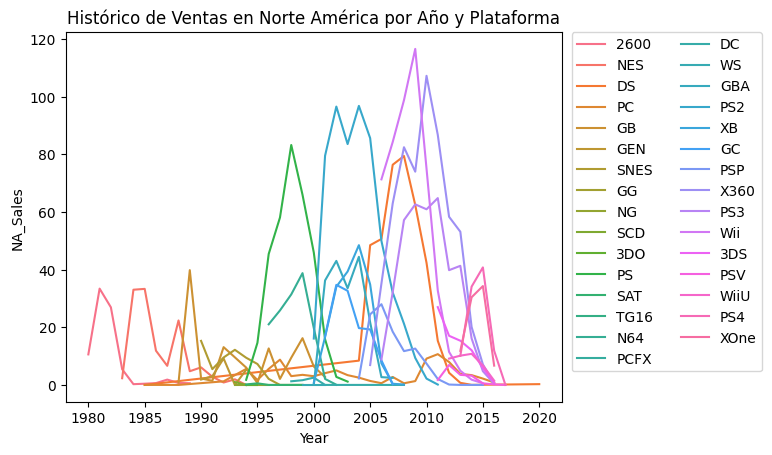

In [50]:
# Ventas de NA
fig = sns.lineplot(data=df.groupby(['Year', 'Platform']).sum(numeric_only=True).reset_index(), x='Year', y='NA_Sales', hue='Platform')
fig.set(title='Histórico de Ventas en Norte América por Año y Plataforma')
fig.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, ncol=2)

# Usando Plotly
fig = px.line(data_frame=df.groupby(['Year', 'Platform']).sum(numeric_only=True).reset_index(), x='Year', y='NA_Sales', color='Platform', title='Histórico de Ventas en Norte América por Año y Plataforma')
fig.show()


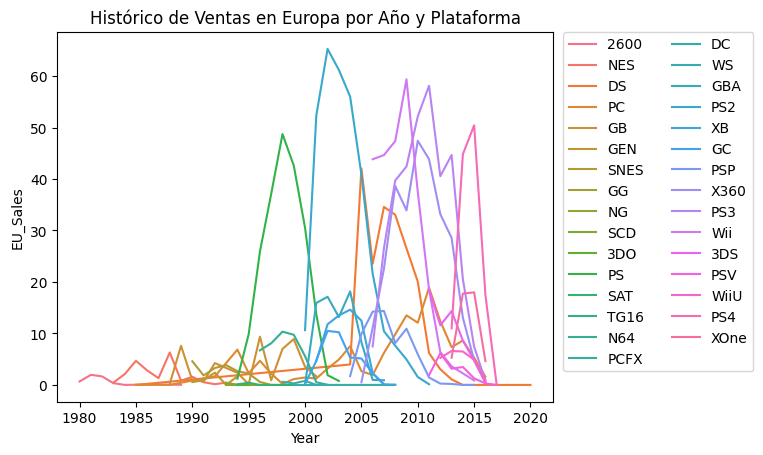

In [51]:
# Ventas de Europa
fig = sns.lineplot(data=df.groupby(['Year', 'Platform']).sum(numeric_only=True).reset_index(), x='Year', y='EU_Sales', hue='Platform')
fig.set(title='Histórico de Ventas en Europa por Año y Plataforma')
fig.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, ncol=2)

# Usando Plotly
fig = px.line(data_frame=df.groupby(['Year', 'Platform']).sum(numeric_only=True).reset_index(), x='Year', y='EU_Sales', color='Platform', title='Histórico de Ventas en Europa por Año y Plataforma')
fig.show()

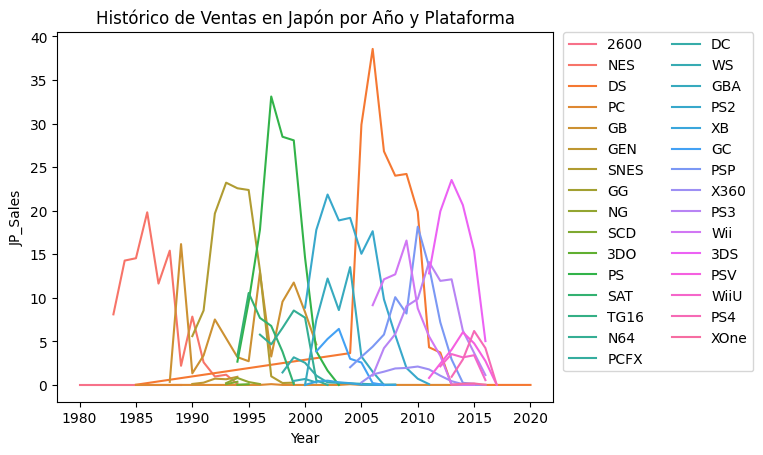

In [52]:
# Ventas de Japón
fig = sns.lineplot(data=df.groupby(['Year', 'Platform']).sum(numeric_only=True).reset_index(), x='Year', y='JP_Sales', hue='Platform')
fig.set(title='Histórico de Ventas en Japón por Año y Plataforma')
fig.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, ncol=2)

# Usando Plotly
fig = px.line(data_frame=df.groupby(['Year', 'Platform']).sum(numeric_only=True).reset_index(), x='Year', y='JP_Sales', color='Platform', title='Histórico de Ventas en Japón por Año y Plataforma')
fig.show()


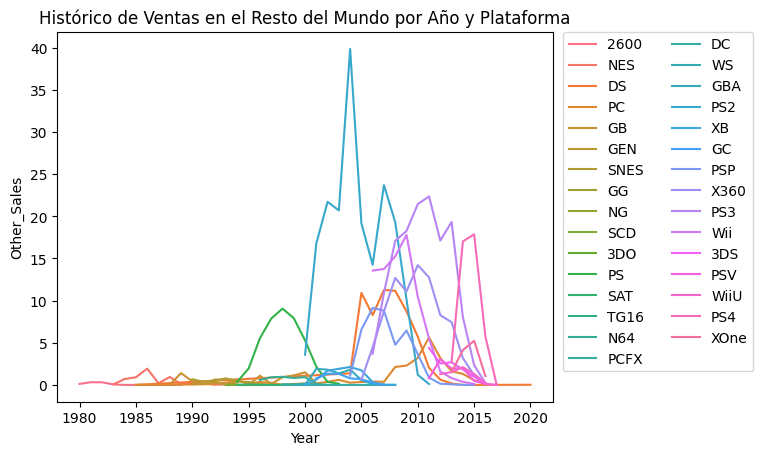

In [53]:
# Ventas del Resto del Mundo
fig = sns.lineplot(data=df.groupby(['Year', 'Platform']).sum(numeric_only=True).reset_index(), x='Year', y='Other_Sales', hue='Platform')
fig.set(title='Histórico de Ventas en el Resto del Mundo por Año y Plataforma')
fig.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, ncol=2)

# Usando Plotly
fig = px.line(data_frame=df.groupby(['Year', 'Platform']).sum(numeric_only=True).reset_index(), x='Year', y='Other_Sales', color='Platform', title='Histórico de Ventas en el Resto del Mundo por Año y Plataforma')
fig.show()


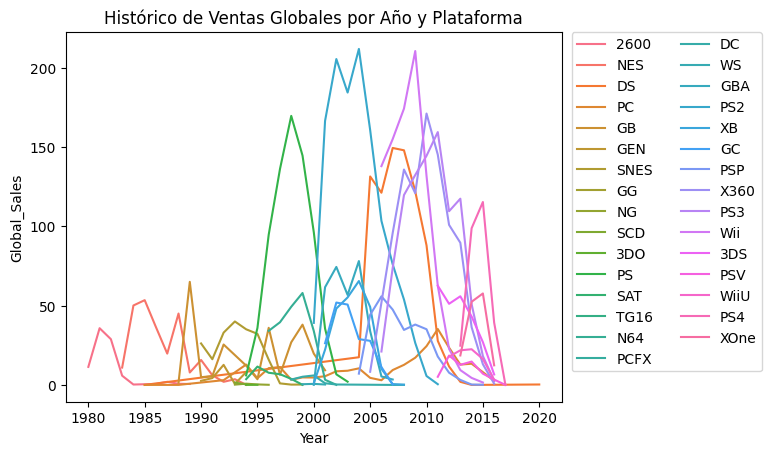

In [57]:
# Ventas Globales
fig = sns.lineplot(data=df.groupby(['Year', 'Platform']).sum(numeric_only=True).reset_index(), x='Year', y='Global_Sales', hue='Platform')
fig.set(title='Histórico de Ventas Globales por Año y Plataforma')
fig.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, ncol=2)

# Usando Plotly
fig = px.line(data_frame=df.groupby(['Year', 'Platform']).sum(numeric_only=True).reset_index(), x='Year', y='Global_Sales', color='Platform', title='Histórico de Ventas Globales por Año y Plataforma')
fig.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_8564\3460914288.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

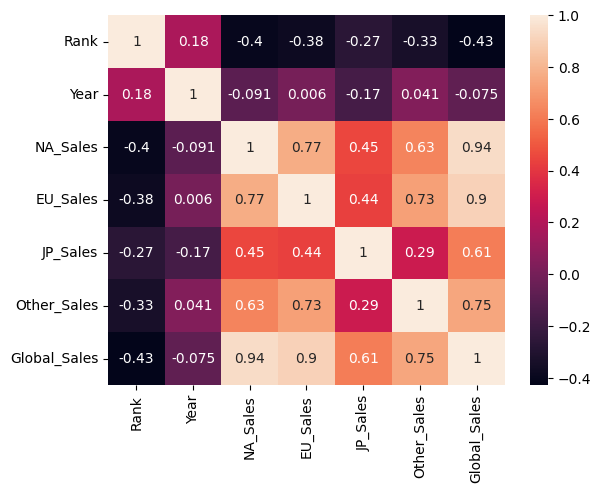

In [55]:
# Heatmap de la correlación entre 
sns.heatmap(df.corr(), annot=True)

### Insights 13:
Buscando tendencias de correlación entre las ventas de las diferentes regiones o una entre el año y las ventas que pueda indicar el crecimiento de alguna región
- No se ve una correlación entre el año y las ventas de ninguna región. Esto se puede deber a que el dataset contiene muy pocas ventas en los últimos años que este comprende dado que se incluyeron muy pocos juegos de esos últimos años
- Existen correlaciones positivas importantes entre las ventas de Norte América y Europa, Norte América y el resto del mundo y entre Europa y el resto del mundo, lo que puede indicar que estos mercados son muy parecidos entre sí y si un juego es popular en una de las regiones, es probable que sea popular en las otras dos
- La región que no tiene una correlación tan alta con las demás es Japón, por lo que podemos inferir que es un mercado un poco diferente y que no porque un juego haya sido un éxito en las otras regiones, se venderá bien o será el más popular en Japón

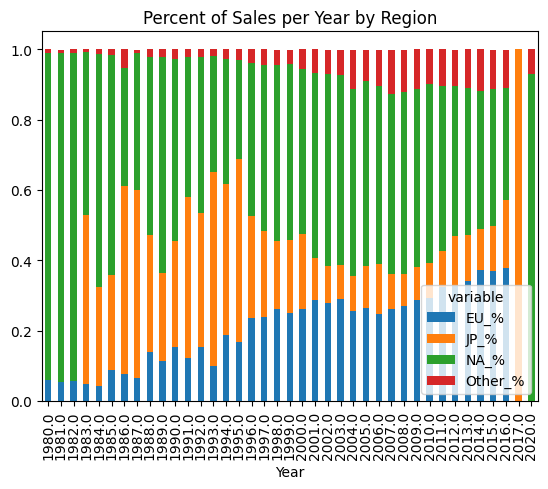

In [56]:
# Porcentaje del total de ventas por región por año

# Transformar df
df_aux = df.groupby('Year').sum(numeric_only=True).reset_index()
df_aux['NA_%'] = df_aux['NA_Sales'] / df_aux['Global_Sales']
df_aux['EU_%'] = df_aux['EU_Sales'] / df_aux['Global_Sales']
df_aux['JP_%'] = df_aux['JP_Sales'] / df_aux['Global_Sales']
df_aux['Other_%'] = df_aux['Other_Sales'] / df_aux['Global_Sales']
df_aux.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], inplace=True, axis=1)
df_aux = pd.melt(df_aux, id_vars=['Year'], value_vars=['NA_%', 'EU_%', 'JP_%', 'Other_%'])

# Gráficar
fig = df_aux.pivot(index='Year', columns='variable', values='value').plot(kind='bar', stacked=True, title='Percent of Sales per Year by Region')

# Graficar con Plotly
fig = px.bar(data_frame=df_aux, x='Year', y='value', color='variable')
fig.show()

### Insights 14:
- Se puede observar en la gráfica que el marketshare de las diferentes regiones o qué tan importantes son para las ventas globales ha cambiado a través del tiempo
- Se puede ver que en años más recientes las ventas totales son igual de grandes en Europa que en Norte América
- En todos los años, el 90% o más de las ventas se concentran en Norte América, Europa y Japón
- El porcentaje del total de ventas que fué de la región de Japón ha ido disminuyendo en los últimos años y la principal región que creció en su porcentaje del total de ventas fue Europa 
- De acuerdo con lo visto en la gráfica de correlación, donde establecimos que las ventas en Norte América, las ventas en Europa y las ventas en el resto del mundo tienen una correlación signicativa y que más del 80% de las ventas en años recientes vienen de estas mismas regiones, tiene más sentido que las empresas desarrollen videojuegos pensados en gustos y con campañas de publicidad enfocadas a hacerlos exitosos en estos tres mercados y no en Japón, que tiene tendencias diferentes y un marketshare pequeño a comparación de las otras tres regiones